In [1]:
import openqcs.tools as tools
import numpy as np
from numpy import sqrt, sin, cos
from scipy.linalg import logm

In [43]:
# Look up table for variety of parameter of diagonal pseudo Kraus operator
from numpy import pi

dKraus = [
    [
        np.matrix([[0, -1j], [1j, 0]]),
        np.matrix([[1, 0], [0, 1]])
    ],
    [
        np.matrix([[0,1],[1,0]]),
        np.matrix([[1,0],[0,-1]])
    ]
    

]

# Output message
class Message:
    def __init__(self):
        self.ier = False
        self.err = 0.0
        self.variant = 0 # variant of param for diagonal pseudo Kraus operator



def get_iterative_kraus_op(rho_in, rho_out, variant=0):
    # check if rho_in and rho_out are 2x2 density matrices
    if rho_in.shape[0]!=2 or rho_out.shape[0]!=2:
        raise ValueError("wrong dimension")
        
    if not tools.is_density_matrix(rho_in, pseudo=False) or not tools.is_density_matrix(rho_out, pseudo=False):
        raise ValueError("rho_in and rho_out have to be density matrices")
        
    # Define return values
    msg = Message()
    
        
    D0, U0 = tools.diagonalize(rho_in)
    D1, U1 = tools.diagonalize(rho_out)
    
    D0 = D0.real
    D1 = D1.real
    
    s0 = D0[0,0]
    s1 = D1[0,0]
    
    if 1-s0 <= s1 <= s0:
        msg.ier=True
        p = (s0 - s1)/(2*s0 - 1)
        
        S0 = dKraus[variant][0]
        S1 = dKraus[variant][1]
        
        E0 = U1@S0@U0.H
        E1 = U1@S1@U0.H
        
        rho_out_proj = p*E0@rho_in@E0.H + (1-p)*E1@rho_in@E1.H
        msg.err = np.linalg.norm(rho_out_proj - rho_out)
        
        return p, E0, E1, msg
    
    else:
        p = 0
        E0 = np.matrix(np.zeros((2,2)))
        E1 = np.matrix(np.zeros((2,2)))
        return p, E0, E1, msg

def test_vaiants(k):
    N = 10000
    n = 0
    data = []
    for i in range(N):

        rho_out = tools.random_density_matrix()
        rho_in = tools.random_density_matrix()
        p, E0, E1, msg = get_iterative_kraus_op(rho_in, rho_out, variant=k)
        if msg.ier:
            n += 1
            data.append(msg.err)


    return data


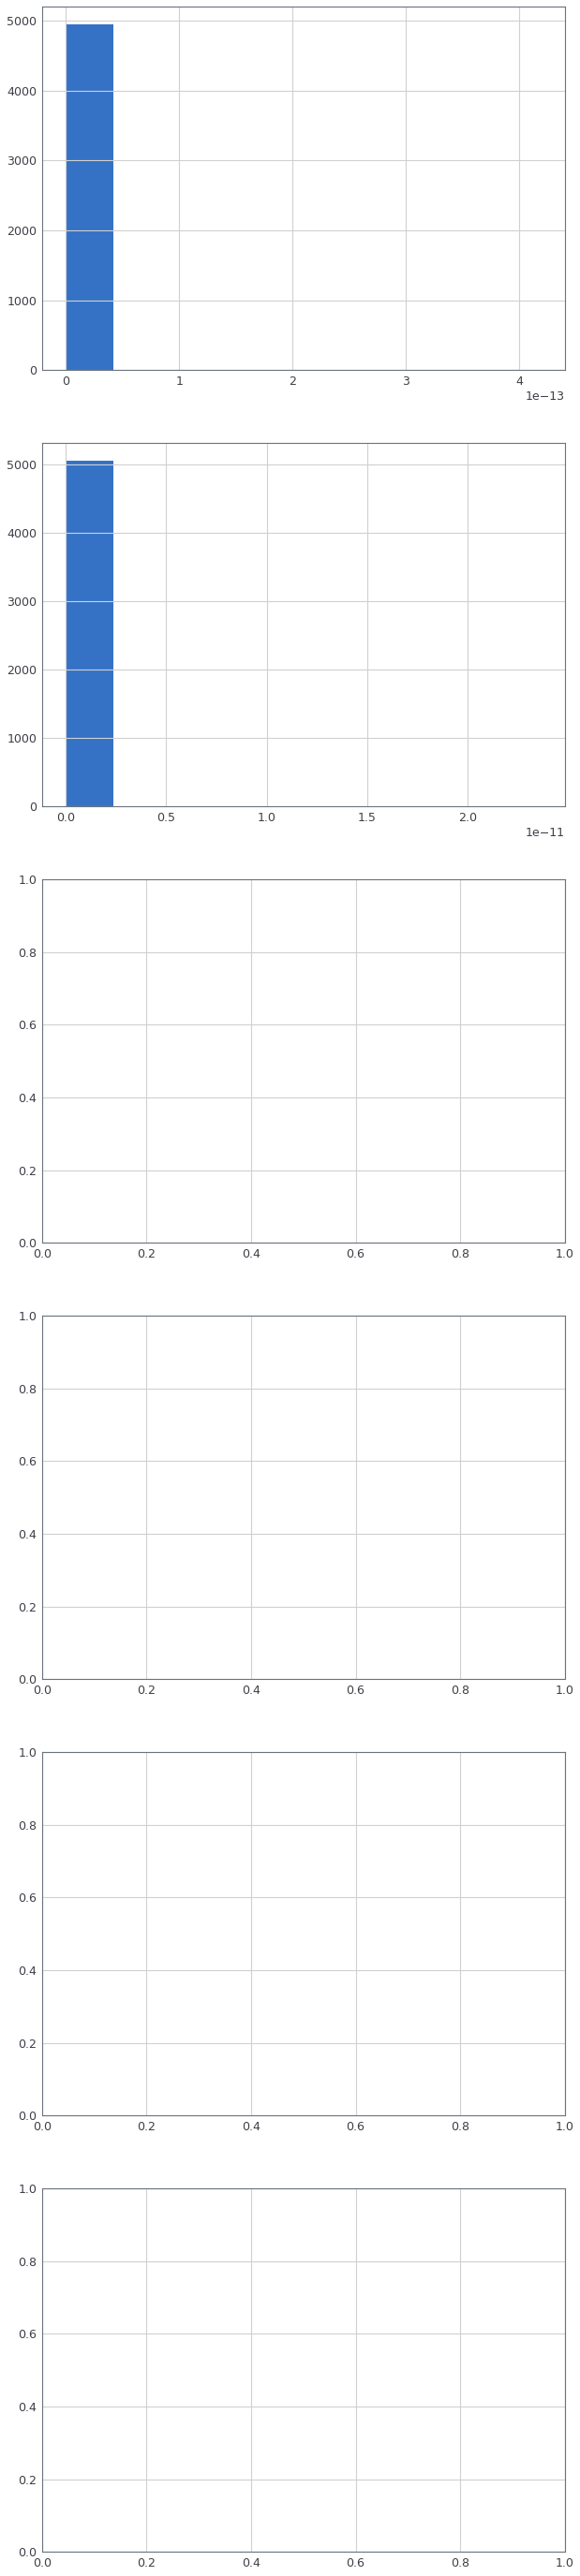

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(DIAGPARAM), figsize=(10, 50))
for k in range(2):
    data = test_vaiants(k)
    axes[k].hist(data)
    
plt.show()
    
    
    
        

In [37]:
for param in DIAGPARAM:
    param0 = np.array([param[0], param[1], 0.0])
    param1 = np.array([param[2], param[3], 0.0])
    
    U0 = tools.su2(param0)
    U1 = tools.su2(param1)
    
    print("U0: \n", U0)
    print("U1: \n", U1)
    print()

U0: 
 [[ 3.74939946e-33+6.123234e-17j -1.00000000e+00+0.000000e+00j]
 [ 1.00000000e+00-0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[-1.+1.2246468e-16j  0.+0.0000000e+00j]
 [-0.+0.0000000e+00j -1.-1.2246468e-16j]]

U0: 
 [[ 3.74939946e-33+6.123234e-17j -1.00000000e+00+0.000000e+00j]
 [ 1.00000000e+00-0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[ 1.0000000e+00-1.2246468e-16j -1.2246468e-16+0.0000000e+00j]
 [ 1.2246468e-16-0.0000000e+00j  1.0000000e+00+1.2246468e-16j]]

U0: 
 [[ 3.74939946e-33+6.123234e-17j -1.00000000e+00+0.000000e+00j]
 [ 1.00000000e+00-0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[ 1.0000000e+00-1.2246468e-16j  1.2246468e-16+0.0000000e+00j]
 [-1.2246468e-16+0.0000000e+00j  1.0000000e+00+1.2246468e-16j]]

U0: 
 [[ 3.74939946e-33+6.123234e-17j  1.00000000e+00+0.000000e+00j]
 [-1.00000000e+00+0.000000e+00j  3.74939946e-33-6.123234e-17j]]
U1: 
 [[-1.+1.2246468e-16j  0.+0.0000000e+00j]
 [-0.+0.0000000e+00j -1.-1.2246468e-16j]]

U0: 
 [[ 3.74939946e